In [43]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [44]:
#handwrite dataset from keras
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [45]:
X_train.shape

(60000, 28, 28)

In [46]:
len(X_train)

60000

In [47]:
len(X_test)

10000

In [48]:
X_train[0].shape

(28, 28)

In [49]:
#2D array like this
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

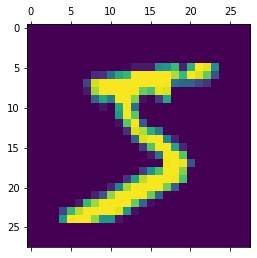

In [50]:
#Showing image
plt.matshow(X_train[0])

In [51]:
y_train[0]

5

In [52]:
#Scale
X_train = X_train / 255
X_test = X_test / 255


In [53]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [54]:
#We are going to flatten our training and test dataset- so we need to 1 dimension
#we need (600, 28x28 = 768)
X_train_flattend = X_train.reshape(len(X_train),28*28)
X_test_flattend = X_test.reshape(len(X_test),28*28)
X_train_flattend.shape

(60000, 784)

In [55]:
X_test_flattend.shape

(10000, 784)

In [56]:
X_test_flattend

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Very simple neural network with no hidden layers

In [64]:
#Lets Create NN
#input layer -> 784 element
#output layer -> 10 element (0 to 9 for digit)

#Dense means = all the neurons one layer are connected with every other neuron in the second layer
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer = 'adam', #we will talk about optimizer
    loss = 'sparse_categorical_crossentropy',  #loss function
    metrics=['accuracy']
)

model.fit(X_train_flattend, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 706us/step - loss: 0.4784 - accuracy: 0.8740
Epoch 2/5
1875/1875 [==============================] - 1s 703us/step - loss: 0.3042 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 1s 706us/step - loss: 0.2837 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 1s 738us/step - loss: 0.2729 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 1s 741us/step - loss: 0.2666 - accuracy: 0.9259


In [65]:
#Accuracy test dataset
model.evaluate(X_test_flattend)

313/313 [==============================] - 0s 407us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

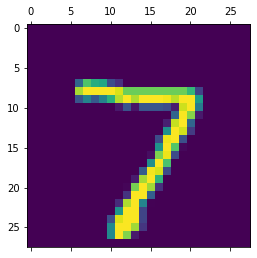

In [68]:
plt.matshow(X_test[0])

In [71]:
y_predicted = model.predict(X_test_flattend)

#Look maxiumum
y_predicted[0]


array([2.0682663e-02, 4.7070665e-07, 5.7436317e-02, 9.1009521e-01,
       1.8812418e-03, 1.1452538e-01, 1.9409310e-06, 9.9966979e-01,
       7.5733185e-02, 6.3840413e-01], dtype=float32)

In [73]:
np.argmax(y_predicted[0])

7

In [77]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [75]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [79]:
#Confusion matrix

cm = tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1118,    4,    1,    0,    1,    4,    2,    5,    0],
       [   3,    8,  953,    8,    9,    5,   12,    8,   22,    4],
       [   3,    0,   28,  905,    1,   37,    2,   12,   14,    8],
       [   1,    2,    7,    1,  913,    0,   11,    3,    9,   35],
       [   7,    3,    4,   19,   10,  797,   17,    5,   23,    7],
       [   8,    3,    7,    1,    7,   13,  916,    2,    1,    0],
       [   1,    6,   28,    3,    8,    1,    0,  942,    0,   39],
       [   9,   12,   12,   21,    9,   47,    9,   12,  837,    6],
       [  10,    7,    2,    8,   29,   10,    0,   23,    3,  917]])>

Text(69.0, 0.5, 'Truth')

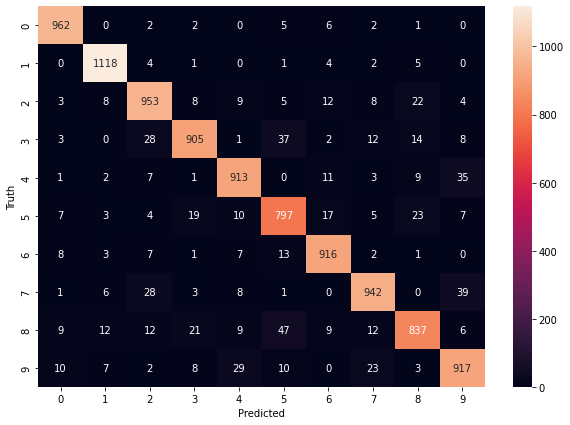

In [80]:
#visualization
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using hidden layer

In [83]:
#With hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'), #input layer important, hidden layer 100
    keras.layers.Dense(10, activation='sigmoid') #output layer
])

model.compile(
    optimizer = 'adam', #we will talk about optimizer
    loss = 'sparse_categorical_crossentropy',  #loss function
    metrics=['accuracy']
)

model.fit(X_train_flattend, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 943us/step - loss: 0.2773 - accuracy: 0.9210
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1269 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0881 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0668 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0525 - accuracy: 0.9839


In [84]:
model.evaluate(X_test_flattend, y_test)

313/313 [==============================] - 0s 648us/step - loss: 0.0784 - accuracy: 0.9759


[0.0784478709101677, 0.9758999943733215]

Text(69.0, 0.5, 'Truth')

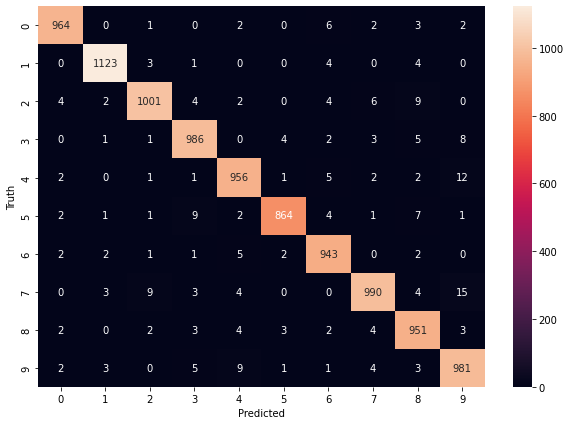

In [85]:
y_predicted = model.predict(X_test_flattend)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')



# Using Flatten layer so that we don't have to call .reshape on input dataset

In [87]:
#Auto Flatten
#Same Code
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,activation='relu'), #input layer important, hidden layer 100
    keras.layers.Dense(10, activation='sigmoid') #output layer
])

model.compile(
    optimizer = 'adam', #we will talk about optimizer
    loss = 'sparse_categorical_crossentropy',  #loss function
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2729 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1263 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0891 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0672 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0545 - accuracy: 0.9836
